In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize, special

In [2]:
data = np.genfromtxt("ex2data1.txt", delimiter=",")

In [3]:
X = data[:,:2]
y = data[:,2]
y = y[:,np.newaxis]
m = len(X)
theta = np.zeros((X.shape[1]+1,1))
X = np.concatenate((np.ones((m,1)),X),axis=1)
y.shape

(100, 1)

In [4]:
theta.transpose()

array([[ 0.,  0.,  0.]])

In [5]:
colormap=np.array(['r','b'])
custom_color = colormap[y.astype(int)].flatten()
markermap = np.array(['o','x'])
custom_markers = markermap[y.astype(int)].flatten()

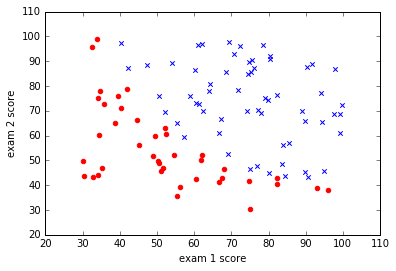

In [6]:
plt.ylabel('exam 2 score')
plt.xlabel('exam 1 score')
for i in range(len(X[:,0])):
    plt.scatter(X[:,1][i],X[:,2][i],color=custom_color[i], marker=custom_markers[i])


In [7]:
def predict(X,theta):
    return special.expit(np.dot(X,theta))


In [8]:
def cost(theta):
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    prediction = predict(X,theta)
    return 1/m*np.sum(np.dot((-y.T),np.log(prediction))-np.dot((1-y).T,np.log(1-prediction)))

In [85]:
def regularized_cost(theta,gamma=0.1):
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    prediction = predict(X,theta)
    regularizer = np.sum(np.delete(theta,0,0))
    return 1/m*np.sum(np.dot((-y.T),np.log(prediction))-np.dot((1-y).T,np.log(1-prediction)))+(gamma/(2*m))*regularizer

In [86]:
def gradient(theta):
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    return 1/m * ((np.dot(X.T,(predict(X,theta)-y))))#-np.dot(X.T,y)).T)

In [87]:
def regularized_gradient(theta,gamma=0.1):
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    regularizer = (gamma/m) * (np.insert(np.delete(theta,0,0),0,0,0))
    #print(regularizer.shape)
    grad = (1/m * ((np.dot(X.T,(predict(X,theta)-y))))) + regularizer
    return grad.flatten()


In [88]:
def minimize(theta):
    #return optimize.fmin(regularized_cost,theta)
    return optimize.fmin_tnc(regularized_cost,theta,fprime=regularized_gradient)

In [89]:
a = minimize(theta)
regularized_cost(a[0])

0.20370162673074932

In [99]:
regularized_cost(theta)

0.69314718055994529